In [160]:
import sklearn
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix


In [146]:
gameStats = pd.read_csv(r"C:\Users\joeho\Documents\nba.box.scores.csv")
gameStats.head()


,gmDate,seasonType,seasonID,season,teamWins,teamLosses,teamAbbr,teamLoc,teamRslt,teamRsltCode,...,opptDrtg,opptEDiff,opptPlayP,opptAR,opptAST_TO,opptSTL_TO,opptPoss,opptPace,matchWinner,HteamPTSdiff
0,10/26/2010,Regular,2010,2010-11,0,1,MIA,Away,Loss,0,...,90.4,9.1,0.41,24.75,1.39,0.33,88.5,88.5,BOS,8
1,10/26/2010,Regular,2010,2010-11,0,1,PHO,Away,Loss,0,...,102.7,15.6,0.49,23.96,2.58,0.92,89.6,89.6,POR,14
2,10/26/2010,Regular,2010,2010-11,0,1,HOU,Away,Loss,0,...,107.2,1.9,0.43,18.00,1.75,0.92,102.6,102.6,LAL,2
3,10/27/2010,Regular,2010,2010-11,0,2,HOU,Away,Loss,0,...,128.7,4.0,0.57,21.27,2.08,0.42,99.5,99.5,GSW,4
4,10/27/2010,Regular,2010,2010-11,2,0,POR,Away,Win,1,...,112.1,-11.4,0.40,19.04,1.27,0.53,87.4,87.4,POR,-10


In [147]:
for col in gameStats.columns: 
    print(col)

gmDate
seasonType
seasonID
season
teamWins
teamLosses
teamAbbr
teamLoc
teamRslt
teamRsltCode
teamDayOff
teamPTS
teamAST
teamTO
teamMin
teamSTL
teamBLK
teamPF
teamFGA
teamFGM
teamFGP
team2PA
team2PM
team2PP
team3PA
team3PM
team3PP
teamFTA
teamFTM
teamFTfreq
teamFTP
teamORB
teamDRB
teamTRB
teamPTS1
teamPTS2
teamPTS3
teamPTS4
teamPTS5
teamPTS6
teamPTS7
teamPTS8
teamPTS9
teamPTS10
teamTREBP
teamASSTP
teamTSP
teamEFGP
teamOREBP
teamDREBP
teamTOP
teamSTLP
teamBLKP
teamBLKR
teamPPS
teamFIC
teamFIC40
teamOrtg
teamDrtg
teamEDiff
teamPlayP
teamAR
teamPoss
teamAST_TO
teamPace
teamSTL_TO
opptWins
opptLosses
opptAbbr
opptLoc
opptRslt
opptRsltCode
opptDayOff
opptPTS
opptAST
opptTO
opptMin
opptSTL
opptBLK
opptPF
opptFGA
opptFGM
opptFGP
oppt2PA
oppt2PM
oppt2PP
oppt3PA
oppt3PM
oppt3PP
opptFTA
opptFTM
opptFTfreq
opptFTP
opptORB
opptDRB
opptTRB
opptPTS1
opptPTS2
opptPTS3
opptPTS4
opptPTS5
opptPTS6
opptPTS7
opptPTS8
opptPTS9
opptPTS10
opptTREBP
opptASSTP
opptTSP
opptEFGP
opptOREBP
opptDREBP
opptTOP
opptST

In [148]:
awayShooting = gameStats[['teamFGA',
'teamFGM',
'teamFGP',
'team2PA',
'team2PM',
'team2PP',
'team3PA',
'team3PM',
'team3PP',
'teamFTA',
'teamFTM',
'teamFTP']]

In [168]:
from sklearn.model_selection import train_test_split
# X = gameStats[['teamDayOff','teamPTS','teamAST','teamTO','teamMin','teamSTL','teamBLK','teamPF','teamFGA','teamFGM','teamFGP','team2PA','team2PM','team2PP','team3PA','team3PM','team3PP','teamFTA','teamFTM','teamFTP','teamORB','teamDRB','teamTRB','teamTREBP',
# 'teamASSTP',
# 'teamTSP',
# 'teamEFGP',
# 'teamOREBP',
# 'teamDREBP',
# 'teamTOP',
# 'teamSTLP',
# 'teamBLKP',
# 'teamBLKR',
# 'teamPPS',
# 'teamFIC',
# 'teamFIC40',
# 'teamOrtg',
# 'teamDrtg',
# 'teamEDiff',
# 'teamPlayP',,
# 'teamPoss',
# 'teamAST_TO',
# 'teamPace']]


#simplified version of X 
# X = gameStats[['teamAST','teamTO','teamFGA','teamFGM','teamFGP','team2PA','team2PM','team2PP','team3PA','team3PM','team3PP','teamFTA','teamFTM','teamFTP',]]

#Four Factors
X = gameStats[['teamEFGP','opptEFGP','teamTOP','opptTOP','teamOREBP','teamDREBP','teamFTfreq','opptFTfreq']]
y = gameStats.teamRsltCode

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [169]:
# import xgboost as xgb
# from xgboost import XGBClassifier

# train = xgb.Dmatrix(X_train, label=y_train)
# test = xgb.Dmatrix(X_test, label=y_test)
model = XGBClassifier()
model.fit(X_train,y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 93.96%


In [170]:
# param = {
#     'max_depth': 4,
#     'eta':0.3,
#     'objective': 'multi:softmax',
#     'num_class': 3}
# epochs = 10


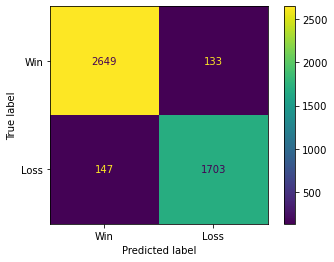

In [171]:
#Testing The Model
plot_confusion_matrix(model,X_test,y_test,values_format='d', display_labels=["Win","Loss"])


In [153]:
# model = xgb.train(param, train, epochs)

In [163]:

model = XGBClassifier(
    seed = 42,
                      objective='binary:logistic',
                      gamma= 0.1,
                      max_depth =4,
                      reg_lambda =10,
                      scale_pos_weight =10,
                      subsample = 0.9,
                      colsample_bytree = 0.5,
                      n_estimators=1
                     )
model.fit(X_train,y_train)

bst = model.get_booster()
for importance_type in ('weight','gain','cover','total_gain','total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type = importance_type))
    
node_params = {'shape':'box', 
               'style': 'filled, rounded',
              'fillcolor': '#78cbe'}

leaf_params = {'shape':'box', 
               'style': 'filled',
              'fillcolor': 'e48038'}

# model.to_graphviz(model, num_trees = 0,size = "10,10",
#                  condition_node_params = node_params,
#                  leaf_node_params = leaf_params)

weight:  {'teamEFGP': 3, 'teamOREBP': 3, 'opptFTfreq': 3, 'opptTOP': 3}
gain:  {'teamEFGP': 534.7180286666666, 'teamOREBP': 73.36889653333333, 'opptFTfreq': 35.49289066, 'opptTOP': 29.423074100000004}
cover:  {'teamEFGP': 4934.166666666667, 'teamOREBP': 641.5833333333334, 'opptFTfreq': 991.0, 'opptTOP': 762.75}
total_gain:  {'teamEFGP': 1604.1540859999998, 'teamOREBP': 220.10668959999998, 'opptFTfreq': 106.47867198, 'opptTOP': 88.26922230000001}
total_cover:  {'teamEFGP': 14802.5, 'teamOREBP': 1924.75, 'opptFTfreq': 2973.0, 'opptTOP': 2288.25}


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

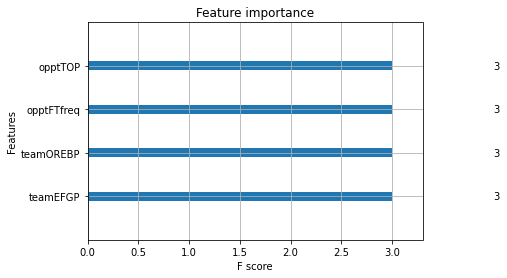

In [164]:
#Visualize The Model
from matplotlib import pyplot as plt
xgb.plot_importance(model)
